<a href="https://colab.research.google.com/github/Arif111866/Deep-Learning-AI/blob/main/Linear_regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.6 MB/s eta 0:00:00


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn # Import the mglearn library
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [13]:
X.shape
print(X)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 1.16406475e-02]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.82676920e-01
  1.29930407e-01 1.71795127e-02]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 2.87987643e-02]]


In [5]:
print("lr.coef_: ", lr.coef_)         # Weight (slope)
print("lr.intercept_: ", lr.intercept_) # Bias (intercept)

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


## Overfitting

In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


## ridge

### 📘 Ridge Regression (L2 Regularization)

Ridge regression minimizes the following objective:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} w_j^2
$$

Where:  
- $y_i$ is the true target  
- $\hat{y}_i = \mathbf{w} \cdot \mathbf{x}_i + b$ is the prediction  
- $w_j$ are the model weights  
- $\alpha$ is the regularization strength  
- The second term is the **L2 penalty**

---

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.89
Test set score: 0.75


In [18]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))



Training set score: 0.79
Test set score: 0.64
Training set score: 0.93
Test set score: 0.77


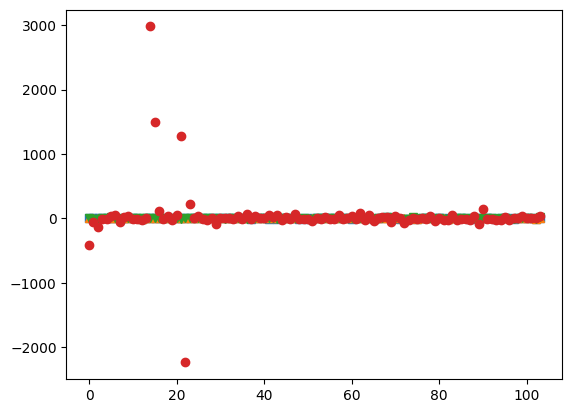

In [19]:
import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

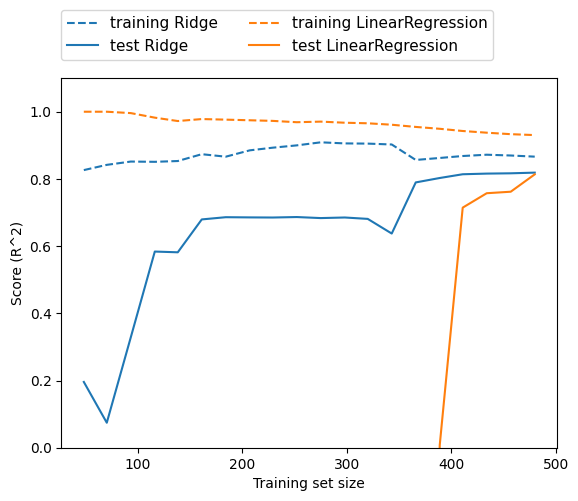

In [20]:
mglearn.plots.plot_ridge_n_samples()

### 📗 Lasso Regression (L1 Regularization)

Lasso regression minimizes the following objective:

$$
\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |w_j|
$$

Where:  
- $|w_j|$ denotes the absolute value of each weight  
- The second term is the **L1 penalty**  
- This encourages **sparse** solutions (some weights become zero)

In [22]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training score: 0.29
Test score: 0.21
Number of features used: 4


In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training score: 0.90
Test score: 0.77
Features used: 33


In [24]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Features used: {}".format(np.sum(lasso0001.coef_ != 0)))

Training score: 0.95
Test score: 0.64
Features used: 96


In [1]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1.0")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1.0")
plt.legend()
plt.xlabel("Feature index")
plt.ylabel("Coefficient magnitude")


NameError: name 'plt' is not defined